<a href="https://colab.research.google.com/github/jaehakimm/Sentiment-analysis-tiktokcomment-lovepotiondrink/blob/main/lovepotion_Drink_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pythainlp torch transformers sentencepiece

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load Thai sentiment model
model_name = "airesearch/wangchanberta-base-att-spm-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Function to classify sentiment
def classify_sentiment_thai(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_label = torch.argmax(probs).item()

    # Map label to sentiment
    sentiment_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return sentiment_map[sentiment_label]

# Example usage
thai_text = "‡∏ß‡∏±‡∏ô‡∏ô‡∏µ‡πâ‡∏≠‡∏≤‡∏Å‡∏≤‡∏®‡∏î‡∏µ‡∏°‡∏≤‡∏Å‡πÄ‡∏•‡∏¢"
print(classify_sentiment_thai(thai_text))


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/282 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/546 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/905k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/423M [00:00<?, ?B/s]

Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Neutral


In [ ]:
thai_text = "‡∏£‡πâ‡∏≠‡∏ô‡∏°‡∏≤‡∏Å ‡∏≠‡∏≤‡∏£‡∏°‡∏ì‡πå‡πÄ‡∏™‡∏µ‡∏¢"
print(classify_sentiment_thai(thai_text))

Negative


In [ ]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load Thai sentiment model
model_name = "airesearch/wangchanberta-base-att-spm-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=3)

# Function to classify sentiment
def classify_sentiment_thai(text):
    if pd.isna(text) or not isinstance(text, str):
        return "Neutral"
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
    outputs = model(**inputs)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_label = torch.argmax(probs).item()

    # Map label to sentiment
    sentiment_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    return sentiment_map[sentiment_label]

# Load dataset
file_path = "/dataset_tiktok-comments-scraper_2025-03-24_03-33-35-788.csv"
df = pd.read_csv(file_path)

# Apply sentiment analysis
df["sentiment"] = df["text"].apply(classify_sentiment_thai)

# Save the results
df.to_csv("sentiment_results.csv", index=False)
print("Sentiment analysis completed and saved to 'sentiment_results.csv'.")


Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at airesearch/wangchanberta-base-att-spm-uncased and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Sentiment analysis completed and saved to 'sentiment_results.csv'.


In [ ]:
pip install seaborn

In [ ]:
import seaborn as sns

<ipython-input-36-5bb579d206ea>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette={"Positive": "green", "Negative": "red", "Neutral": "blue"})


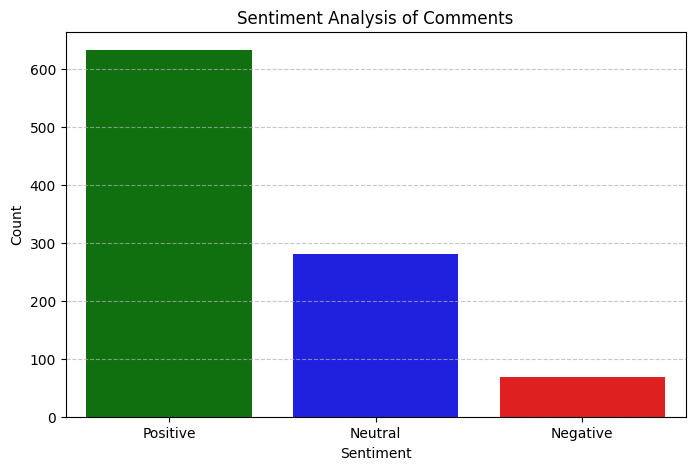

In [ ]:
sentiment_counts = df["sentiment"].value_counts()

# Plot sentiment distribution using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette={"Positive": "green", "Negative": "red", "Neutral": "blue"})
plt.title("Sentiment Analysis of Comments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
df_saved = pd.read_csv("sentiment_results.csv")
print("\nUpdated DataFrame:")
df_saved.head()


Updated DataFrame:


avatarThumbnail                  cid  \
0  https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...  7485203351748952833   
1  https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...  7485034971444806418   
2  https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...  7485179142767411986   
3  https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...  7485086530685371143   
4  https://p16-sign-va.tiktokcdn.com/tos-maliva-a...  7485051584575259423   

   createTime             createTimeISO  diggCount  \
0  1742784751  2025-03-24T02:52:31.000Z          1   
1  1742745534  2025-03-23T15:58:54.000Z          1   
2  1742779108  2025-03-24T01:18:28.000Z          0   
3  1742757547  2025-03-23T19:19:07.000Z          0   
4  1742749415  2025-03-23T17:03:35.000Z          0   

                                               input  likedByAuthor  \
0  https://www.tiktok.com/@iamsungstarwin/video/7...          False   
1  https://www.tiktok.com/@iamsungstarwin/video/7...          False   
2  https://www.tiktok.com/@iamsungstarwin/video/7...          False   
3  https://www.tiktok.com/@iamsungstarwin/video/7...          False   
4  https://www.tiktok.com/@iamsungstarwin/video/7...          False   

  pinnedByAuthor  repliesToId  replyCommentTotal  \
0          False          NaN                0.0   
1          False          NaN                0.0   
2          False          NaN                0.0   
3          False          NaN                0.0   
4          False          NaN                0.0   

                                   submittedVideoUrl  \
0  https://www.tiktok.com/@iamsungstarwin/video/7...   
1  https://www.tiktok.com/@iamsungstarwin/video/7...   
2  https://www.tiktok.com/@iamsungstarwin/video/7...   
3  https://www.tiktok.com/@iamsungstarwin/video/7...   
4  https://www.tiktok.com/@iamsungstarwin/video/7...   

                                                text                  uid  \
0                                     Team New Gen!ü•∞  6849654550107014145   
1                                         Top secret  6993857711843984410   
2                                             Love üíï  6921898619626030081   
3                                     Sweet portions  7420221998682457089   
4  ‡∏™‡∏π‡πâ‡πÜ‡∏ô‡∏∞‡∏Ñ‡∏∞ ‡∏ó‡∏≥‡∏™‡∏¥‡πà‡∏á‡∏ó‡∏µ‡πà‡πÄ‡∏£‡∏≤‡∏≠‡∏¢‡∏≤‡∏´‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏°‡∏±‡∏ô‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î ‡∏´‡∏ô‡∏π‡πÄ...  7316633523564348458   

          uniqueId                                        videoWebUrl  \
0  oldgonesnewcome  https://www.tiktok.com/@iamsungstarwin/video/7...   
1  ig_chawalwit_07  https://www.tiktok.com/@iamsungstarwin/video/7...   
2         poukkii0  https://www.tiktok.com/@iamsungstarwin/video/7...   
3        gdragxnox  https://www.tiktok.com/@iamsungstarwin/video/7...   
4       him_htuner  https://www.tiktok.com/@iamsungstarwin/video/7...   

  sentiment  
0  Positive  
1  Positive  
2   Neutral  
3  Positive  
4   Neutral

In [ ]:
df_positive = df_saved[df_saved["sentiment"] == "Positive"]
df_positive

avatarThumbnail                  cid  \
0    https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...  7485203351748952833   
1    https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...  7485034971444806418   
3    https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...  7485086530685371143   
5    https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...  7485191673527714578   
6    https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...  7484979022524105490   
..                                                 ...                  ...   
977  https://p16-sign-va.tiktokcdn.com/tos-maliva-a...  7484980280634557192   
978  https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...  7484979892829209365   
979  https://p16-common-sign-sg.tiktokcdn-us.com/to...  7484980840335082248   
981  https://p16-common-sign-sg.tiktokcdn-us.com/to...  7484980822849618709   
982  https://p16-sign-useast2a.tiktokcdn.com/tos-us...  7484980822492824328   

     createTime             createTimeISO  diggCount  \
0    1742784751  2025-03-24T02:52:31.000Z          1   
1    1742745534  2025-03-23T15:58:54.000Z          1   
3    1742757547  2025-03-23T19:19:07.000Z          0   
5    1742782031  2025-03-24T02:07:11.000Z          0   
6    1742732504  2025-03-23T12:21:44.000Z      15605   
..          ...                       ...        ...   
977  1742732793  2025-03-23T12:26:33.000Z          2   
978  1742732704  2025-03-23T12:25:04.000Z          0   
979  1742732923  2025-03-23T12:28:43.000Z          0   
981  1742732923  2025-03-23T12:28:43.000Z          0   
982  1742732918  2025-03-23T12:28:38.000Z          0   

                                                 input  likedByAuthor  \
0    https://www.tiktok.com/@iamsungstarwin/video/7...          False   
1    https://www.tiktok.com/@iamsungstarwin/video/7...          False   
3    https://www.tiktok.com/@iamsungstarwin/video/7...          False   
5    https://www.tiktok.com/@iamsungstarwin/video/7...          False   
6    https://www.tiktok.com/@iamsungstarwin/video/7...          False   
..                                                 ...            ...   
977  https://www.tiktok.com/@iamsungstarwin/video/7...          False   
978  https://www.tiktok.com/@iamsungstarwin/video/7...          False   
979  https://www.tiktok.com/@iamsungstarwin/video/7...          False   
981  https://www.tiktok.com/@iamsungstarwin/video/7...          False   
982  https://www.tiktok.com/@iamsungstarwin/video/7...          False   

    pinnedByAuthor  repliesToId  replyCommentTotal  \
0            False          NaN                0.0   
1            False          NaN                0.0   
3            False          NaN                0.0   
5            False          NaN                0.0   
6            False          NaN               20.0   
..             ...          ...                ...   
977          False          NaN                0.0   
978          False          NaN                0.0   
979          False          NaN                0.0   
981          False          NaN                0.0   
982          False          NaN                0.0   

                                     submittedVideoUrl  \
0    https://www.tiktok.com/@iamsungstarwin/video/7...   
1    https://www.tiktok.com/@iamsungstarwin/video/7...   
3    https://www.tiktok.com/@iamsungstarwin/video/7...   
5    https://www.tiktok.com/@iamsungstarwin/video/7...   
6    https://www.tiktok.com/@iamsungstarwin/video/7...   
..                                                 ...   
977  https://www.tiktok.com/@iamsungstarwin/video/7...   
978  https://www.tiktok.com/@iamsungstarwin/video/7...   
979  https://www.tiktok.com/@iamsungstarwin/video/7...   
981  https://www.tiktok.com/@iamsungstarwin/video/7...   
982  https://www.tiktok.com/@iamsungstarwin/video/7...   

                                           text                  uid  \
0                                Team New Gen!ü•∞  6849654550107014145   
1                                    Top secret

In [ ]:
df_negative = df_saved[df_saved["sentiment"] == "Negative"]
df_negative

avatarThumbnail                  cid  \
11   https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...  7485023534824293128   
19   https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...  7484980924561720085   
28   https://p16-sign-useast2a.tiktokcdn.com/tos-us...  7484989246709809928   
50   https://p16-sign-useast2a.tiktokcdn.com/tos-us...  7485035131427603221   
119  https://p16-common-sign-sg.tiktokcdn-us.com/to...  7485210695257129749   
..                                                 ...                  ...   
893  https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...  7484986448253895431   
898  https://p16-common-sign-sg.tiktokcdn-us.com/to...  7484984879127462674   
947  https://p16-common-sign-va.tiktokcdn-us.com/to...  7484980729181569793   
950  https://p16-common-sign-sg.tiktokcdn-us.com/to...  7484980676635673352   
962  https://p19-common-sign-sg.tiktokcdn-us.com/to...  7484980231993295623   

     createTime             createTimeISO  diggCount  \
11   1742742865  2025-03-23T15:14:25.000Z        925   
19   1742732951  2025-03-23T12:29:11.000Z        313   
28   1742734875  2025-03-23T13:01:15.000Z         22   
50   1742745563  2025-03-23T15:59:23.000Z         62   
119  1742786440  2025-03-24T03:20:40.000Z          1   
..          ...                       ...        ...   
893  1742734225  2025-03-23T12:50:25.000Z          0   
898  1742733866  2025-03-23T12:44:26.000Z          0   
947  1742732910  2025-03-23T12:28:30.000Z          0   
950  1742732883  2025-03-23T12:28:03.000Z          0   
962  1742732784  2025-03-23T12:26:24.000Z          0   

                                                 input  likedByAuthor  \
11   https://www.tiktok.com/@iamsungstarwin/video/7...          False   
19   https://www.tiktok.com/@iamsungstarwin/video/7...          False   
28   https://www.tiktok.com/@iamsungstarwin/video/7...          False   
50   https://www.tiktok.com/@iamsungstarwin/video/7...          False   
119  https://www.tiktok.com/@iamsungstarwin/video/7...          False   
..                                                 ...            ...   
893  https://www.tiktok.com/@iamsungstarwin/video/7...          False   
898  https://www.tiktok.com/@iamsungstarwin/video/7...          False   
947  https://www.tiktok.com/@iamsungstarwin/video/7...          False   
950  https://www.tiktok.com/@iamsungstarwin/video/7...          False   
962  https://www.tiktok.com/@iamsungstarwin/video/7...          False   

    pinnedByAuthor   repliesToId  replyCommentTotal  \
11           False           NaN                2.0   
19           False           NaN                3.0   
28           False  7.484986e+18                NaN   
50           False  7.485030e+18                NaN   
119          False           NaN                0.0   
..             ...           ...                ...   
893          False           NaN                0.0   
898          False           NaN                0.0   
947          False           NaN                0.0   
950          False           NaN                0.0   
962          False           NaN                0.0   

                                     submittedVideoUrl  \
11   https://www.tiktok.com/@iamsungstarwin/video/7...   
19   https://www.tiktok.com/@iamsungstarwin/video/7...   
28   https://www.tiktok.com/@iamsungstarwin/video/7...   
50   https://www.tiktok.com/@iamsungstarwin/video/7...   
119  https://www.tiktok.com/@iamsungstarwin/video/7...   
..                                                 ...   
893  https://www.tiktok.com/@iamsungstarwin/video/7...   
898  https://www.tiktok.com/@iamsungstarwin/video/7...   
947  https://www.tiktok.com/@iamsungstarwin/video/7...   
950  https://www.tiktok.com/@iamsungstarwin/video/7...   
962  https://www.tiktok.com/@iamsungstarwin/video/7...   

                                                  text                  uid  \
11   ‡∏≠‡∏£‡πà‡∏≠‡∏¢‡πÑ‡∏°‡πà‡∏≠‡∏£‡πà‡∏≠‡∏¢‡∏Ñ‡∏∏‡∏ì‡∏ï‡∏±‡∏ô‡∏û‡∏π‡∏î‡πÄ‡∏™‡∏°‡∏≠‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡∏

In [ ]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [ ]:
df_negative = df_saved[df_saved["sentiment"] == "Negative"][["text", "sentiment"]]
df_negative

text sentiment
11   ‡∏≠‡∏£‡πà‡∏≠‡∏¢‡πÑ‡∏°‡πà‡∏≠‡∏£‡πà‡∏≠‡∏¢‡∏Ñ‡∏∏‡∏ì‡∏ï‡∏±‡∏ô‡∏û‡∏π‡∏î‡πÄ‡∏™‡∏°‡∏≠‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡∏ô‡∏ö‡∏≠‡∏Å‡πÄ‡∏≠‡∏á...  Negative
19                                    ‡∏£‡∏≠‡πÄ‡∏´‡∏°‡∏≤‡πÅ‡∏•‡πâ‡∏ß‡∏Ñ‡πà‡∏∞‡πÜ‡πÜü§©  Negative
28                                           ‡∏°‡∏µ‡∏ô‡∏∞‡∏Ñ‡∏£‡∏±‡∏öü§≠  Negative
50   ‡∏°‡∏µ‡∏™‡∏ï‡∏¥‡πÉ‡∏ô‡∏Å‡∏≤‡∏£‡πÄ‡∏™‡∏û‡∏Ç‡πà‡∏≤‡∏ß ‡∏ñ‡πâ‡∏≤‡πÄ‡∏û‡∏à‡∏Ç‡πà‡∏≤‡∏ß‡∏´‡∏•‡∏±‡∏Å‡∏´‡∏£‡∏∑‡∏≠‡∏ó‡∏µ‡∏ß‡∏µ‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏•...  Negative
119                             ‡πÄ‡∏Å‡πà‡∏á‡∏°‡∏≤‡∏Å‡∏ß‡∏±‡∏¢‡∏£‡∏∏‡πà‡∏ô‡∏™‡∏°‡∏±‡∏¢‡∏ô‡∏µ‡πâü•∞  Negative
120  ‡∏Ç‡∏≠‡∏•‡∏á‡∏Ç‡∏≠‡∏á‡πÄ‡∏¢‡∏≠‡∏∞‡πÜ‡πÑ‡∏î‡πâ‡∏°‡∏±‡πâ‡∏¢‡∏Ñ‡∏£‡∏±‡∏ö‡πÅ‡∏ö‡∏ö‡πÄ‡∏¢‡∏≠‡∏∞‡πÜ‡πÄ‡∏•‡∏¢‡∏≠‡∏∞‡∏Ñ‡∏£‡∏±‡∏ö‡∏û‡∏≠‡∏£‡∏π‡πâ‡∏ß...  Negative
132  ‡∏ä‡∏≠‡∏ö‡πÄ‡∏ß‡∏•‡∏≤‡∏ó‡∏µ‡πà‡∏ó‡∏≥‡∏Ñ‡∏•‡∏¥‡∏õ‡πÅ‡∏ö‡∏ö‡∏ô‡∏µ‡πâ‡∏≠‡∏∞ ‡∏î‡∏π‡πÅ‡∏•‡πâ‡∏ß‡∏£‡∏π‡πâ‡∏™‡∏∂‡∏Å‡∏°‡∏µ energy...  Negative
137  ‡∏ú‡∏°‡∏≠‡∏¢‡∏≤‡∏Å‡∏™‡∏°‡∏±‡∏Ñ‡∏£ ‡∏ù‡πà‡∏≤‡∏¢‡∏ù‡∏•‡∏¥‡∏ï‡∏Ñ‡∏£‡∏±‡∏ö ‡∏û‡∏£‡πâ‡∏≠‡∏°‡πÄ‡∏î‡∏¥‡∏ô‡∏ó‡∏≤‡∏á‡∏û‡∏£‡πâ‡∏≠‡∏°‡∏ó‡∏≥‡∏á‡∏≤...  Negative
146          ‡∏£‡∏≠‡∏ä‡∏¥‡∏°‡∏≠‡∏¢‡∏π‡πà‡∏ô‡∏∞‡∏Ñ‡∏∞ ‡∏Ç‡∏≠‡πÅ‡∏ö‡∏ö‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏ô‡πâ‡∏≥‡∏ï‡∏≤‡∏•‡∏î‡πâ‡∏ß‡∏¢‡∏à‡πâ‡∏≤ü•∞ü•∞ü•∞ü•∞  Negative
150                            @—Ç–∫–≤889_‚ú®"‡∏û‡∏µ‡πà‡∏ä‡∏≤‡∏¢‡πÑ‡∏ü"‚ú®36.  Negative
170  ‡∏≠‡∏¢‡∏≤‡∏Å‡πÄ‡∏õ‡πâ‡∏ô‡∏´‡∏ô‡∏∂‡πà‡∏á‡πÉ‡∏ô‡∏ú‡∏π‡πâ‡∏£‡πà‡∏ß‡∏°‡∏õ‡∏£‡∏∞‡∏ä‡∏∏‡∏° ‡∏≠‡∏¢‡∏≤‡∏Å‡∏£‡∏π‡πâ‡∏ß‡πà‡∏≤‡∏Ñ‡∏∏‡∏¢‡∏≠‡∏∞‡πÑ‡∏£...  Negative
178                 ‡∏≠‡∏¢‡∏≤‡∏Å‡∏ó‡∏≥‡∏ô‡πâ‡∏≥‡∏ä‡∏≤‡πÑ‡∏ó‡∏¢ ‡∏™‡∏≤‡∏°‡∏≤‡∏£‡∏ñ‡∏ï‡∏¥‡∏î‡∏ï‡πà‡∏≠‡πÑ‡∏î‡πâ‡∏Ñ‡∏£‡∏±‡∏ö  Negative
186  ‡∏ï‡πâ‡∏≠‡∏á‡∏≠‡∏≠‡∏Å‡∏°‡∏≤‡∏î‡∏µ‡πÅ‡∏ô‡πà‡πÜ‡πÜ‡∏ï‡∏±‡πâ‡∏á‡πÉ‡∏à‡∏Ç‡∏ô‡∏≤‡∏î‡∏ô‡∏µ‡πâ‡∏à‡∏∞‡∏£‡∏≠‡∏≠‡∏∏‡∏î‡∏´‡∏ô‡∏∏‡∏ô‡∏ô‡∏∞‡∏Ñ‡∏£‡∏±‡∏ö...  Negative
190                                  ‡∏ä‡∏≠‡∏ö‡πÇ‡∏´‡∏°‡∏î‡∏ó‡∏≥‡∏á‡∏≤‡∏ô‡∏°‡∏≤‡∏Å üëç  Negative
218                                            ‡∏£‡∏≠‡∏Ñ‡πâ‡∏≤‡∏öü•∞  Negative
232          ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à‡πÅ‡∏ô‡πà‡∏ô‡∏≠‡∏ô‡∏ú‡∏°‡πÄ‡∏ä‡∏∑‡πà‡∏≠‡πÉ‡∏ô‡∏®‡∏±‡∏Å‡∏¢‡∏†‡∏≤‡∏û‡∏Ç‡∏≠‡∏á‡∏ó‡∏∏‡∏Å‡∏Ñ‡∏£‡∏±‡∏öüò≥üëçüëç  Negative
240                               ‡∏Ñ‡∏ô‡∏Ç‡∏¢‡∏±‡∏ô‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏ß‡∏±‡∏ô‡∏≠‡∏î‡∏ï‡∏≤‡∏¢ü•∫  Negative
241                                    ‡∏ã‡πâ‡∏≠‡∏™‡∏ß‡∏¢‡∏Ç‡∏∂‡πâ‡∏ô‡πÑ‡∏õ‡∏≠‡∏µ‡∏Å  Negative
247                                     02:11 ‡πÑ‡∏õ‡∏Å‡∏±‡∏ô‡∏ï‡πà‡∏≠  Negative
249                             ‡∏û‡∏ß‡∏Å‡πÄ‡∏ò‡∏≠‡∏ó‡∏≥‡πÑ‡∏î‡πâ ‡πÄ‡∏£‡∏≤‡πÄ‡∏ä‡∏∑‡πà‡∏≠ ü§®  Negative
262                                ‡∏Ñ‡πà‡∏≤‡∏ô‡πâ‡∏≥‡∏ï‡∏≤‡∏•‡∏û‡∏µ‡πà‡∏ã‡∏∏‡∏á:üìàüìàüìà  Negative
271     ‡∏•‡∏≠‡∏á‡∏ü‡∏±‡∏á‡πÑ‡∏≠‡πÄ‡∏î‡∏µ‡∏¢‡∏û‡∏µ‡πà‡∏Å‡∏£‡∏î‡∏π‡∏Ñ‡∏£‡∏±‡∏ö ‡∏°‡∏∏‡∏°‡∏ï‡πà‡∏≤‡∏á‡∏Ç‡∏≠‡∏á‡∏Ñ‡∏ô‡∏Ç‡∏≤‡∏¢‡πÑ‡∏°‡πâ‡∏Å‡∏ß‡∏≤‡∏î  Negative
277                                      ‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à ‡πÅ‡∏ô‡πà‡∏ô‡∏≠‡∏ô  Negative
313                         ‡∏û‡∏µ‡πà‡∏à‡∏∞‡∏≠‡∏∏‡∏î‡∏´‡∏ô‡∏∏‡∏ô ‡∏ô‡∏∞ ‡∏≠‡∏¢‡∏≤‡∏Å‡∏•‡∏≠‡∏á‡∏ó‡∏≤‡∏ô  Negative
315                                   ‡∏™‡∏π‡πâ‡πÜ‡∏Ñ‡∏£‡∏±‡∏ö‡∏ú‡∏°‡∏£‡∏≠‡∏Å‡∏¥‡∏ôü•∞  Negative
338                             ‡∏£‡∏≠‡∏ä‡∏¥‡∏°‡∏ó‡∏∏‡∏Å‡∏£‡∏™‡∏ä‡∏≤‡∏ï‡∏¥‡πÄ‡∏•‡∏¢‡∏Ñ‡∏£‡∏±‡∏öü•∞  Negative
342                                 ‡πÄ‡∏Ç‡πâ‡∏≤7-11 ‡∏´‡∏ô‡πà‡∏≠‡∏¢‡∏ô‡πâ‡∏≤‡∏≤  Negative
358                    ‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÉ‡∏à‡πÅ‡∏•‡∏∞‡∏û‡∏£‡πâ‡∏≠‡∏°‡∏ã‡∏±‡∏û‡∏û‡∏≠‡∏ó‡∏ô‡∏∞‡∏Ñ‡∏£‡∏±‡∏ö  Negative
367                                              ‡∏£‡∏≠‡πÜ‡∏Ñ‡∏∞  Negative
382                               ‡∏´‡∏ô‡∏π‡∏£‡∏≠‡∏ã‡∏∑‡πâ‡∏≠‡∏Ñ‡πà‡∏≤ ‡∏û‡∏µ‡πà‡∏ã‡∏∏‡∏á‡∏á  Negative
430                                                ü•∞‚ù§Ô∏è  Negative
443                                                  üíñ  Negative
449                                                 ü•∞ü•∞  Negative
451                                                  üíñ  Negative
453                                                 ‚ù§Ô∏è  Negative
459                                                 ü•∞ü•∞  Negative
465                                               

In [ ]:
pip install openai

Sentiment analysis completed and saved to 'sentiment_results_openai.csv'.

Updated DataFrame:
                                                text sentiment
0                                     Team New Gen!ü•∞  Positive
1                                         Top secret   Neutral
2                                             Love üíï  Positive
3                                     Sweet portions  Positive
4  ‡∏™‡∏π‡πâ‡πÜ‡∏ô‡∏∞‡∏Ñ‡∏∞ ‡∏ó‡∏≥‡∏™‡∏¥‡πà‡∏á‡∏ó‡∏µ‡πà‡πÄ‡∏£‡∏≤‡∏≠‡∏¢‡∏≤‡∏´‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏°‡∏±‡∏ô‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î ‡∏´‡∏ô‡∏π‡πÄ...  Positive


<ipython-input-64-a5f48d0ec8d3>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment", palette={"Positive": "green", "Negative": "red", "Neutral": "blue"})


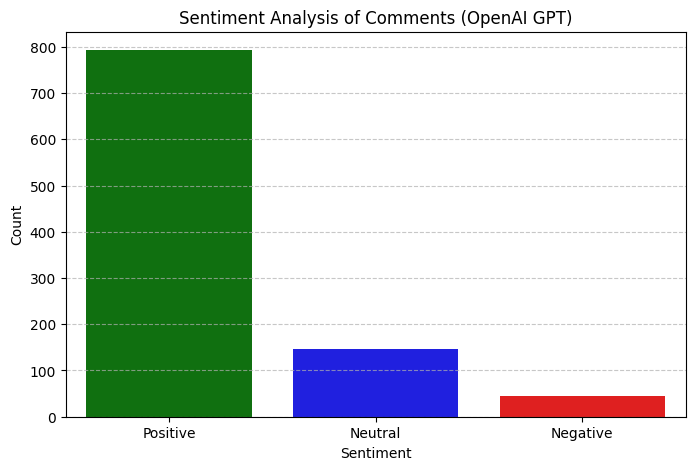

In [ ]:
import openai
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ‚úÖ Initialize OpenAI client
client = openai.OpenAI(api_key="Your api key")

# ‚úÖ Function to classify sentiment using OpenAI GPT
def classify_sentiment_openai(text):
    if pd.isna(text) or not isinstance(text, str) or text.strip() == "":
        return "Neutral"

    prompt = f"""You are expert in sentiment analysis in Thai language and social network comment. Tell me whether the following sentence's sentiment is positive, negative, or neutral.
    Sentence: "{text}"
    Sentiment:"""

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.5,
            max_tokens=10
        )

        sentiment = response.choices[0].message.content.strip()

        # ‚úÖ Ensure valid sentiment output
        valid_sentiments = {"Positive", "Neutral", "Negative"}
        return sentiment if sentiment in valid_sentiments else "Neutral"

    except Exception as e:
        print(f"Error processing text: {text[:30]}... - {e}")
        return "Neutral"

# ‚úÖ Load dataset (Fixed file path issue)
file_path = "/dataset_tiktok-comments-scraper_2025-03-24_03-33-35-788.csv"
df = pd.read_csv(file_path)

# ‚úÖ Ensure 'text' column exists
if "text" not in df.columns:
    raise ValueError("Error: The dataset does not contain a 'text' column.")

# ‚úÖ Apply sentiment analysis
df["sentiment"] = df["text"].apply(classify_sentiment_openai)

# ‚úÖ Save results
df.to_csv("sentiment_results_openai.csv", index=False)
print("Sentiment analysis completed and saved to 'sentiment_results_openai.csv'.")

# ‚úÖ Display updated DataFrame
print("\nUpdated DataFrame:")
print(df[["text", "sentiment"]].head())

# ‚úÖ Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="sentiment", palette={"Positive": "green", "Negative": "red", "Neutral": "blue"})
plt.title("Sentiment Analysis of Comments (OpenAI GPT)")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [ ]:
df_saved_openai = pd.read_csv("sentiment_results_openai.csv")
df_saved_openai.head()

avatarThumbnail                  cid  \
0  https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...  7485203351748952833   
1  https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...  7485034971444806418   
2  https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...  7485179142767411986   
3  https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...  7485086530685371143   
4  https://p16-sign-va.tiktokcdn.com/tos-maliva-a...  7485051584575259423   

   createTime             createTimeISO  diggCount  \
0  1742784751  2025-03-24T02:52:31.000Z          1   
1  1742745534  2025-03-23T15:58:54.000Z          1   
2  1742779108  2025-03-24T01:18:28.000Z          0   
3  1742757547  2025-03-23T19:19:07.000Z          0   
4  1742749415  2025-03-23T17:03:35.000Z          0   

                                               input  likedByAuthor  \
0  https://www.tiktok.com/@iamsungstarwin/video/7...          False   
1  https://www.tiktok.com/@iamsungstarwin/video/7...          False   
2  https://www.tiktok.com/@iamsungstarwin/video/7...          False   
3  https://www.tiktok.com/@iamsungstarwin/video/7...          False   
4  https://www.tiktok.com/@iamsungstarwin/video/7...          False   

  pinnedByAuthor  repliesToId  replyCommentTotal  \
0          False          NaN                0.0   
1          False          NaN                0.0   
2          False          NaN                0.0   
3          False          NaN                0.0   
4          False          NaN                0.0   

                                   submittedVideoUrl  \
0  https://www.tiktok.com/@iamsungstarwin/video/7...   
1  https://www.tiktok.com/@iamsungstarwin/video/7...   
2  https://www.tiktok.com/@iamsungstarwin/video/7...   
3  https://www.tiktok.com/@iamsungstarwin/video/7...   
4  https://www.tiktok.com/@iamsungstarwin/video/7...   

                                                text                  uid  \
0                                     Team New Gen!ü•∞  6849654550107014145   
1                                         Top secret  6993857711843984410   
2                                             Love üíï  6921898619626030081   
3                                     Sweet portions  7420221998682457089   
4  ‡∏™‡∏π‡πâ‡πÜ‡∏ô‡∏∞‡∏Ñ‡∏∞ ‡∏ó‡∏≥‡∏™‡∏¥‡πà‡∏á‡∏ó‡∏µ‡πà‡πÄ‡∏£‡∏≤‡∏≠‡∏¢‡∏≤‡∏´‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏°‡∏±‡∏ô‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î ‡∏´‡∏ô‡∏π‡πÄ...  7316633523564348458   

          uniqueId                                        videoWebUrl  \
0  oldgonesnewcome  https://www.tiktok.com/@iamsungstarwin/video/7...   
1  ig_chawalwit_07  https://www.tiktok.com/@iamsungstarwin/video/7...   
2         poukkii0  https://www.tiktok.com/@iamsungstarwin/video/7...   
3        gdragxnox  https://www.tiktok.com/@iamsungstarwin/video/7...   
4       him_htuner  https://www.tiktok.com/@iamsungstarwin/video/7...   

  sentiment  
0  Positive  
1   Neutral  
2  Positive  
3  Positive  
4  Positive

In [ ]:
# ‚úÖ Count occurrences of each sentiment
sentiment_counts = df_saved_openai["sentiment"].value_counts()

# ‚úÖ Print sentiment counts
print("Sentiment Counts:")
print(sentiment_counts)

# ‚úÖ Convert to dictionary (if needed)
sentiment_dict = sentiment_counts.to_dict()
print("\nSentiment Count Dictionary:")
print(sentiment_dict)


Sentiment Counts:
sentiment
Positive    793
Neutral     146
Negative     44
Name: count, dtype: int64

Sentiment Count Dictionary:
{'Positive': 793, 'Neutral': 146, 'Negative': 44}


In [ ]:
# ‚úÖ Display all rows for Negative sentiment
df_negative_openai = df_saved_openai[df_saved_openai["sentiment"] == "Negative"][["text", "sentiment"]]

# ‚úÖ Remove display limits
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_colwidth", None)  # Show full text content

# ‚úÖ Display the full DataFrame
df_negative_openai


text  \
8                                                                                                                                         ‡∏°‡∏µ‡∏û‡∏ß‡∏Å‡πÄ‡∏ß‡πá‡∏ö‡∏û‡∏ô‡∏±‡∏ô‡∏•‡∏á‡∏†‡∏≤‡∏û‡∏ß‡πà‡∏≤‡∏û‡∏µ‡πà‡πÇ‡∏î‡∏ô‡∏ï‡∏≥‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö‡∏Ñ‡πà‡∏∞;^;;;   
11                                                                  ‡∏≠‡∏£‡πà‡∏≠‡∏¢‡πÑ‡∏°‡πà‡∏≠‡∏£‡πà‡∏≠‡∏¢‡∏Ñ‡∏∏‡∏ì‡∏ï‡∏±‡∏ô‡∏û‡∏π‡∏î‡πÄ‡∏™‡∏°‡∏≠‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡∏ô‡∏ö‡∏≠‡∏Å‡πÄ‡∏≠‡∏á‡∏à‡∏≤‡∏Å‡∏¢‡∏≠‡∏î‡∏Ç‡∏≤‡∏¢‡∏ó‡∏≥‡∏≠‡∏≠‡∏Å‡∏°‡∏≤‡∏Å‡∏´‡∏•‡∏≤‡∏¢‡πÜ‡∏£‡∏™‡∏™‡∏∏‡∏î‡∏ó‡πâ‡∏≤‡∏¢‡∏°‡∏±‡∏ô‡∏à‡∏∞‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡πÅ‡∏Ñ‡πà1-2‡∏ï‡∏±‡∏ß‡πÄ‡∏ó‡πà‡∏≤‡∏ô‡∏±‡πâ‡∏ô‡∏ó‡∏µ‡πà‡∏Ç‡∏≤‡∏¢‡πÑ‡∏î‡πâ   
37                                                                                                      ‡πÑ‡∏°‡πà‡πÄ‡∏Ñ‡∏¢‡∏ä‡∏∑‡πâ‡∏≠‡∏Ç‡∏≠‡∏á‡πÄ‡∏î‡πá‡∏Å‡∏ß‡∏±‡∏ô‡∏£‡∏∏‡πà‡∏ô‡πÅ‡∏Å‡πä‡∏á‡∏ô‡∏µ‡πâ‡πÄ‡∏•‡∏¢‡∏ô‡∏∞ ‡πÄ‡∏û‡∏£‡∏≤‡∏∞‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡πÉ‡∏ä‡πâ ‡πÄ‡πÄ‡∏ï‡πà‡∏ñ‡πâ‡∏≤‡∏ô‡πâ‡∏≥ ‡∏≠‡∏∏‡∏î‡∏´‡∏ô‡∏∏‡∏ô‡πÄ‡πÄ‡∏ô‡πà‡∏ô‡∏≠‡∏ô   
38                                                                                                                                                                    ‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏ô‡πâ‡∏≥‡∏ï‡∏≤‡∏•‡∏Ñ‡∏£‡∏±‡∏ö   
41                                                                          ‡∏≠‡∏±‡∏ô‡∏ô‡∏µ‡πâ‡∏Ç‡∏≠‡πÄ‡∏™‡∏ô‡∏≠‡∏Ñ‡∏ß‡∏≤‡∏°‡πÄ‡∏´‡πá‡∏ô‡∏ô‡∏∞‡∏Ñ‡∏∞ ‡∏ñ‡πâ‡∏≤‡∏ô‡πâ‡∏≥‡∏™‡∏µ‡πÄ‡∏Ç‡πâ‡∏°‡∏° ‡∏à‡∏∞‡∏£‡∏π‡πâ‡∏™‡∏∂‡∏Å‡∏ß‡πà‡∏≤‡∏ú‡∏™‡∏°‡∏™‡∏µ‡πÄ‡∏¢‡∏≠‡∏∞ ‡πÅ‡∏•‡πâ‡∏ß‡πÑ‡∏°‡πà‡∏î‡∏µ‡∏ï‡πà‡∏≠‡∏™‡∏∏‡∏Ç‡∏†‡∏≤‡∏û‡∏Ñ‡πà‡∏∞ ‡∏à‡∏∞‡πÑ‡∏°‡πà‡πÄ‡∏•‡∏∑‡∏≠‡∏Å‡∏ó‡∏≤‡∏ô‡∏ö‡πà‡∏≠‡∏¢‡πÄ‡∏•‡∏¢‡∏Ñ‡πà‡∏∞   
43                                                                                                    ‡πÄ‡∏à‡∏≠‡∏°‡∏≤ ‡∏°‡∏µ‡πÅ‡∏ï‡πà‡∏Ñ‡∏ô‡πÇ‡∏û‡∏™‡∏ß‡πà‡∏≤‡∏û‡∏µ‡πà‡πÇ‡∏î‡∏ô‡∏´‡∏°‡∏≤‡∏¢‡∏Ñ‡πâ‡∏ô ‡πÇ‡∏î‡∏ô‡∏à‡∏±‡∏ö‡∏ö‡∏•‡∏≤‡πÜ ‡πÑ‡∏°‡πà‡∏à‡∏£‡∏¥‡∏á‡πÉ‡∏ä‡πà‡πÑ‡∏´‡∏°‡∏Ñ‡∏∞ ‡πÄ‡∏´‡πá‡∏ô‡∏´‡∏•‡∏≤‡∏¢‡πÇ‡∏û‡∏™‡πÄ‡∏•‡∏¢‡πÉ‡∏ô ‡∏ï‡∏ï   
52                                                                                                                                                    ‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ‡πÇ‡∏î‡∏ô‡∏à‡∏±‡∏ö‡∏ô‡∏∞ ‡πÑ‡∏õ‡πÄ‡∏≠‡∏≤‡∏à‡∏≤‡∏Å‡πÑ‡∏´‡∏ô‡∏°‡∏≤‡∏≤‡∏≤‡∏≤   
55                                                                                                                                        ‡∏°‡∏∞‡∏Å‡∏µ‡πâ‡πÄ‡∏û‡∏¥‡πà‡∏á‡πÄ‡∏•‡∏∑‡πà‡∏≠‡∏ô‡πÄ‡∏à‡∏≠‡πÄ‡∏•‡∏¢‡∏≠‡πà‡∏≤ ‡πÄ‡∏•‡∏¢‡∏ß‡πà‡∏≤‡∏•‡∏∞ ‡∏Ç‡πà‡∏≤‡∏ß‡∏õ‡∏•‡∏≠‡∏°   
59                                                                                                                       ‡πÄ‡∏´‡πá‡∏ô‡πÇ‡∏õ‡∏£‡πÑ‡∏ü‡∏•‡πå‡πÅ‡∏•‡πâ‡∏ß‡∏ó‡πâ‡∏≠‡πÄ‡∏•‡∏¢ ‡∏ó‡∏≥‡πÑ‡∏°‡∏û‡πà‡∏≠‡πÅ‡∏°‡πà‡πÑ‡∏°‡πà‡∏î‡∏π‡πÅ‡∏•‡∏´‡∏ô‡∏π‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡∏Å‡∏≤‡∏£‡πÄ‡∏™‡∏û‡∏™‡∏∑‡πà‡∏≠‡∏Ñ‡∏∞   
68                                                                                                   ‡πÄ‡∏Ç‡πâ‡∏≤‡∏¢‡∏≤‡∏Å‡∏°‡∏≤‡∏Å‡∏ò‡∏∏‡∏£‡∏Å‡∏¥‡∏à‡∏ô‡∏µ‡πâ‡πÄ‡∏à‡πâ‡∏≤‡∏ï‡∏•‡∏≤‡∏î‡πÅ‡∏Ç‡πá‡∏á‡πÜ‡πÄ‡∏¢‡∏≠‡∏∞ ‡∏Ñ‡∏π‡πà‡πÅ‡∏Ç‡πà‡∏á‡πÄ‡∏¢‡∏≠‡∏∞‡∏°‡∏≤‡∏Å ‡πÑ‡∏á‡∏Å‡πá‡∏Ç‡∏≠‡πÉ‡∏´‡πâ‡∏õ‡∏£‡∏∞‡∏™‡∏ö‡∏Ñ‡∏ß‡∏≤‡∏°‡∏™‡∏≥‡πÄ‡∏£‡πá‡∏à‡∏Ñ‡∏£‡∏±‡∏ö   
102                                                                                                                                  ‡πÄ‡∏´‡πá‡∏ô‡πÅ‡∏≠‡∏Ñ user3204244941833‡πÄ‡∏≠‡∏≤‡∏û‡∏µ‡πà‡∏ã‡∏∏‡∏á‡πÑ‡∏õ‡∏•‡∏á‡∏ß‡πà‡∏≤‡πÇ‡∏î‡∏ô‡∏à‡∏±‡∏öüòÖ   
107                                                                                                                                                               ‡∏ú‡∏°‡∏ß‡πà‡∏≤‡∏´‡∏°‡∏î‡πÄ‡πÄ‡∏ô‡πà‡∏ï‡πâ‡∏≠‡∏á‡∏£‡∏µ‡∏ö   
120                                                                                                ‡∏Ç‡∏≠‡∏•‡∏á‡∏Ç‡∏≠‡∏á‡πÄ‡∏¢‡∏≠‡∏∞‡πÜ‡πÑ‡∏î‡πâ‡∏°‡∏±‡πâ‡∏¢‡∏Ñ‡∏£‡∏±‡∏ö‡πÅ‡∏ö‡∏ö‡πÄ‡∏¢‡∏≠‡∏∞‡πÜ‡πÄ‡∏•‡∏¢‡∏≠‡∏∞‡∏Ñ‡∏£‡∏±‡∏ö‡∏û‡∏≠‡∏£‡∏π‡πâ‡∏ß‡πà‡∏≤‡∏Ç‡∏≠‡∏á‡∏≠‡∏≠‡∏Å‡∏°‡∏≤‡πÅ‡∏•‡πâ‡∏ß‡πÑ‡∏°‡πà‡∏ó‡∏±‡∏ô‡πÄ‡∏•‡∏¢‡∏Ñ‡∏£‡∏±‡∏ö‡∏Ç‡∏≠‡∏á‡∏´‡∏≤‡∏¢‡∏´‡∏°‡∏î   
122                                                                                 

In [ ]:
df_positive_openai = df_saved_openai[df_saved_openai["sentiment"] == "Positive"][["text", "sentiment"]]
df_positive_openai

text  \
0                                                                                                                                                                                                        Team New Gen!ü•∞   
2                                                                                                                                                                                                                Love üíï   
3                                                                                                                                                                                                        Sweet portions   
4                                                                                                                                                   ‡∏™‡∏π‡πâ‡πÜ‡∏ô‡∏∞‡∏Ñ‡∏∞ ‡∏ó‡∏≥‡∏™‡∏¥‡πà‡∏á‡∏ó‡∏µ‡πà‡πÄ‡∏£‡∏≤‡∏≠‡∏¢‡∏≤‡∏´‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏°‡∏±‡∏ô‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î ‡∏´‡∏ô‡∏π‡πÄ‡∏ä‡∏∑‡πà‡∏≠‡∏ß‡πà‡∏≤‡∏û‡∏ß‡∏Å‡∏û‡∏µ‡πà‡∏ó‡∏≥‡πÑ‡∏î‡πâ üíóüíó   
5                                                                                                                                                                                                             Good luck   
6                                                                                                                                                                                                 ‡∏ß‡∏±‡∏¢‡∏£‡∏∏‡πà‡∏ô‡∏û‡∏±‡∏ô‡∏•‡πâ‡∏≤‡∏ô‡∏ô‡∏ô‡∏ô!!!!   
7                                                                                                                                                                   ‡∏Å‡∏≤‡∏£‡πÄ‡∏î‡∏¥‡∏ô‡∏ó‡∏≤‡∏á‡∏Ñ‡∏£‡∏±‡πâ‡∏á‡πÉ‡∏´‡∏°‡πà‡πÑ‡∏î‡πâ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Ç‡∏µ‡πâ‡∏ô‡πÅ‡∏•‡πâ‡∏ß ‡∏î‡∏∏‡πÄ‡∏î‡∏∑‡∏≠‡∏î‡πÅ‡∏ô‡πà‡∏ô‡∏≠‡∏ô‚ù§Ô∏è   
9                                                                                                     ‡∏û‡∏ß‡∏Å‡πÄ‡∏£‡∏≤‡∏ï‡∏±‡πâ‡∏á‡πÉ‡∏à‡∏ó‡∏≥‡∏°‡∏≤‡∏Å‡πÜ ‡∏Ñ‡∏±‡πâ‡∏ö ‡∏≠‡∏¢‡∏≤‡∏Å‡πÉ‡∏´‡πâ‡∏ó‡∏∏‡∏Å‡∏Ñ‡∏ô‡∏£‡∏≠‡∏î‡∏π‡πÉ‡∏ô‡∏ó‡∏∏‡∏Å‡πÜ EP ‡πÄ‡∏û‡∏£‡∏≤‡∏∞‡∏£‡∏≠‡∏ö‡∏ô‡∏µ‡πâ‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡∏ß‡∏≤‡∏°‡∏ï‡∏±‡πâ‡∏á‡πÉ‡∏à ‡∏•‡∏∏‡∏¢‡∏Å‡∏±‡∏ô‡πÄ‡∏û‡∏∑‡πà‡∏≠‡∏ô ‡∏≠‡∏¢‡∏π‡πà‡∏Ç‡πâ‡∏≤‡∏á‡πÜ‡πÄ‡∏™‡∏°‡∏≠ ‡∏•‡∏∏‡∏¢!!!!‚ú®‚ú®‚ú®   
10                                                                                                                                                                                  ‡∏û‡∏π‡∏î‡∏î‡∏µ‡∏°‡∏≤‡∏Å ‡∏Å‡∏≥‡πÑ‡∏£‡πÑ‡∏°‡πà‡πÉ‡∏ä‡πà‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡πÄ‡∏á‡∏¥‡∏ô‡πÄ‡∏™‡∏°‡∏≠‡πÑ‡∏õ   
12                                                                                                                                                   ‡∏Ç‡∏≠‡πÅ‡∏ö‡∏ö‡πÑ‡∏°‡πà‡∏°‡∏µ‡∏ô‡πâ‡∏≥‡∏ï‡∏≤‡∏•‡∏î‡πâ‡∏ß‡∏¢‡∏Ñ‡∏£‡∏±‡∏ö ‡∏≠‡∏¢‡∏≤‡∏Å‡∏™‡∏ô‡∏±‡∏ö‡∏™‡∏ô‡∏∏‡∏ôlove ‡πÅ‡∏ï‡πà‡∏Å‡∏¥‡∏ô‡∏ô‡πâ‡∏≥‡∏ï‡∏≤‡∏•‡∏°‡∏≤‡∏Å‡πÑ‡∏°‡πà‡πÑ‡∏î‡πâ ü•∞ü•∞   
13                                                                                                                                                                              ‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏ß‡∏±‡∏¢‡∏£‡∏∏‡πà‡∏ô‡∏ó‡∏µ‡πà‡πÄ‡∏à‡πã‡∏á‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î‡∏•‡∏∞‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏ú‡∏°   
14                                                                                                                                                                                ‡∏™‡∏π‡∏ï‡∏£‡∏ô‡πâ‡∏≥‡∏ï‡∏≤‡∏• 0% ‡∏î‡πâ‡∏ß‡∏¢‡∏ô‡∏∞‡∏Ñ‡∏∞ ‡∏´‡∏≠‡∏°‡πÜ ‡πÄ‡∏û‡∏Ñ‡πÄ‡∏Å‡∏à‡∏™‡∏ß‡∏¢   
15                                                                                                                                                                ‡πÄ‡∏£‡∏≤‡πÑ‡∏°‡πà‡πÉ‡∏ä‡πà‡∏ó‡∏µ‡πà1 ‡πÅ‡∏ï‡πà‡πÄ‡∏£‡∏≤‡∏Ñ‡∏∑‡∏≠ ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î ‡∏Ñ‡∏≥‡∏ô‡∏µ‡πâ‡∏ï‡πâ‡∏≠‡∏á‡πÑ‡∏°‡πà‡πÄ‡∏Å‡∏¥‡∏ô‡∏à‡∏£‡∏¥‡∏á ‚ù§   
16                             ‡∏à‡∏≤‡∏Å‡πÉ‡∏à‡πÄ‡∏•‡∏¢‡∏ô‡∏∞‡∏Ñ‡∏∞ ‡∏≠‡∏¢‡∏≤‡∏Å‡πÉ‡∏´‡πâ‡∏ó‡∏≥‡πÅ‡∏û‡πá‡∏Ñ‡πÄ‡∏Å‡∏à‡πÉ‡∏´‡πâ‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏≠‡∏Å‡∏•‡∏±‡∏Å‡∏©‡∏ì‡πå‡∏Ç‡∏≠‡∏á‡πÄ‡∏•‡∏¥‡∏ü‡πÇ‡∏û‡∏ä‡∏±‡πà‡∏ô‡πÄ‡∏•‡∏¢‡∏Ñ‡πà‡∏∞ ‡πÅ‡∏ö‡∏ö‡∏ß‡πà‡∏≤ ‡∏ï‡∏±‡πâ‡

In [1]:
pip install seaborn openai

In [2]:
pip install torch transformers sentencepiece

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 71.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 58.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 43.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [3]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Model details following the first script's structure
model_id = "scb10x/llama-3.2-typhoon-t1-3b-research-preview"
revision = "main"

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_id, revision=revision)
model = AutoModelForSequenceClassification.from_pretrained(
    model_id,
    num_labels=3,
    torch_dtype=torch.bfloat16,
    device_map="auto",
    revision=revision
)

# Load dataset
file_path = "/content/dataset_tiktok-comments-scraper_2025-03-24_03-33-35-788.csv"
df = pd.read_csv(file_path)

# Process each text as a message (similar structure to the first script)
sentiments = []

for text in df["text"]:
    if pd.isna(text) or not isinstance(text, str):
        sentiments.append("Neutral")
        continue

    messages = [{"role": "user", "content": text}]

    # Tokenize using chat-like structure
    input_ids = tokenizer.apply_chat_template(
        messages,
        add_generation_prompt=False,  # No need for generation prompt in classification
        return_tensors="pt"
    ).to(model.device)

    # Perform inference
    outputs = model(input_ids)
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)
    sentiment_label = torch.argmax(probs).item()

    # Map label to sentiment
    sentiment_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
    sentiments.append(sentiment_map[sentiment_label])

# Store results in the DataFrame
df["sentiment"] = sentiments

# Save to CSV
df.to_csv("sentiment_results_typhoon.csv", index=False)
print("Sentiment analysis completed and saved to 'sentiment_results_typhoon.csv'.")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/53.2k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/769 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/899 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Some weights of LlamaForSequenceClassification were not initialized from the model checkpoint at scb10x/llama-3.2-typhoon-t1-3b-research-preview and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Sentiment analysis completed and saved to 'sentiment_results_typhoon.csv'.


<ipython-input-6-c62243a5ca16>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette={"Positive": "green", "Negative": "red", "Neutral": "blue"})


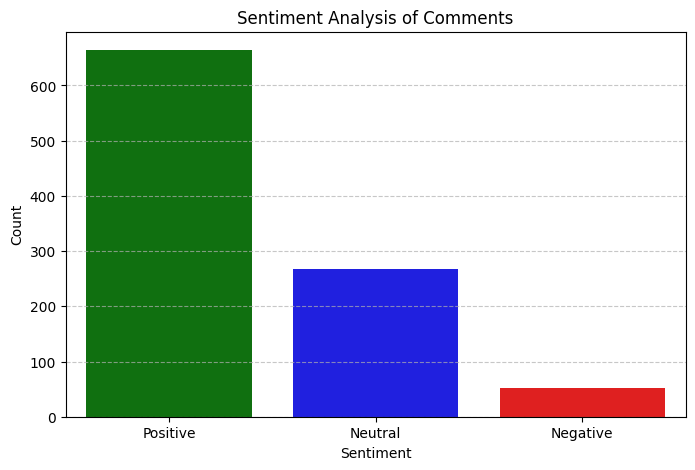

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count occurrences of each sentiment
sentiment_counts = df["sentiment"].value_counts()

# Plot sentiment distribution using Seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette={"Positive": "green", "Negative": "red", "Neutral": "blue"})
plt.title("Sentiment Analysis of Comments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [7]:
df_typhoon = pd.read_csv("sentiment_results_typhoon.csv")
df_typhoon.head()

avatarThumbnail                  cid  \
0  https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...  7485203351748952833   
1  https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...  7485034971444806418   
2  https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...  7485179142767411986   
3  https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...  7485086530685371143   
4  https://p16-sign-va.tiktokcdn.com/tos-maliva-a...  7485051584575259423   

   createTime             createTimeISO  diggCount  \
0  1742784751  2025-03-24T02:52:31.000Z          1   
1  1742745534  2025-03-23T15:58:54.000Z          1   
2  1742779108  2025-03-24T01:18:28.000Z          0   
3  1742757547  2025-03-23T19:19:07.000Z          0   
4  1742749415  2025-03-23T17:03:35.000Z          0   

                                               input  likedByAuthor  \
0  https://www.tiktok.com/@iamsungstarwin/video/7...          False   
1  https://www.tiktok.com/@iamsungstarwin/video/7...          False   
2  https://www.tiktok.com/@iamsungstarwin/video/7...          False   
3  https://www.tiktok.com/@iamsungstarwin/video/7...          False   
4  https://www.tiktok.com/@iamsungstarwin/video/7...          False   

  pinnedByAuthor  repliesToId  replyCommentTotal  \
0          False          NaN                0.0   
1          False          NaN                0.0   
2          False          NaN                0.0   
3          False          NaN                0.0   
4          False          NaN                0.0   

                                   submittedVideoUrl  \
0  https://www.tiktok.com/@iamsungstarwin/video/7...   
1  https://www.tiktok.com/@iamsungstarwin/video/7...   
2  https://www.tiktok.com/@iamsungstarwin/video/7...   
3  https://www.tiktok.com/@iamsungstarwin/video/7...   
4  https://www.tiktok.com/@iamsungstarwin/video/7...   

                                                text                  uid  \
0                                     Team New Gen!ü•∞  6849654550107014145   
1                                         Top secret  6993857711843984410   
2                                             Love üíï  6921898619626030081   
3                                     Sweet portions  7420221998682457089   
4  ‡∏™‡∏π‡πâ‡πÜ‡∏ô‡∏∞‡∏Ñ‡∏∞ ‡∏ó‡∏≥‡∏™‡∏¥‡πà‡∏á‡∏ó‡∏µ‡πà‡πÄ‡∏£‡∏≤‡∏≠‡∏¢‡∏≤‡∏´‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏°‡∏±‡∏ô‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î ‡∏´‡∏ô‡∏π‡πÄ...  7316633523564348458   

          uniqueId                                        videoWebUrl  \
0  oldgonesnewcome  https://www.tiktok.com/@iamsungstarwin/video/7...   
1  ig_chawalwit_07  https://www.tiktok.com/@iamsungstarwin/video/7...   
2         poukkii0  https://www.tiktok.com/@iamsungstarwin/video/7...   
3        gdragxnox  https://www.tiktok.com/@iamsungstarwin/video/7...   
4       him_htuner  https://www.tiktok.com/@iamsungstarwin/video/7...   

  sentiment  
0  Positive  
1  Positive  
2  Positive  
3  Negative  
4  Negative

In [10]:
# ‚úÖ Remove display limits
pd.set_option("display.max_rows", None)  # Show all rows
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_colwidth", None)  # Show full text content

In [11]:
df_typhoon_positive = df_typhoon[df_typhoon["sentiment"] == "Positive"][["text", "sentiment"]]
df_typhoon_positive

text  \
0                                                                                                                                                                                                        Team New Gen!ü•∞   
1                                                                                                                                                                                                            Top secret   
2                                                                                                                                                                                                                Love üíï   
6                                                                                                                                                                                                 ‡∏ß‡∏±‡∏¢‡∏£‡∏∏‡πà‡∏ô‡∏û‡∏±‡∏ô‡∏•‡πâ‡∏≤‡∏ô‡∏ô‡∏ô‡∏ô!!!!   
7                                                                                                                                                                   ‡∏Å‡∏≤‡∏£‡πÄ‡∏î‡∏¥‡∏ô‡∏ó‡∏≤‡∏á‡∏Ñ‡∏£‡∏±‡πâ‡∏á‡πÉ‡∏´‡∏°‡πà‡πÑ‡∏î‡πâ‡πÄ‡∏£‡∏¥‡πà‡∏°‡∏Ç‡∏µ‡πâ‡∏ô‡πÅ‡∏•‡πâ‡∏ß ‡∏î‡∏∏‡πÄ‡∏î‡∏∑‡∏≠‡∏î‡πÅ‡∏ô‡πà‡∏ô‡∏≠‡∏ô‚ù§Ô∏è   
8                                                                                                                                                                           ‡∏°‡∏µ‡∏û‡∏ß‡∏Å‡πÄ‡∏ß‡πá‡∏ö‡∏û‡∏ô‡∏±‡∏ô‡∏•‡∏á‡∏†‡∏≤‡∏û‡∏ß‡πà‡∏≤‡∏û‡∏µ‡πà‡πÇ‡∏î‡∏ô‡∏ï‡∏≥‡∏£‡∏ß‡∏à‡∏à‡∏±‡∏ö‡∏Ñ‡πà‡∏∞;^;;;   
10                                                                                                                                                                                  ‡∏û‡∏π‡∏î‡∏î‡∏µ‡∏°‡∏≤‡∏Å ‡∏Å‡∏≥‡πÑ‡∏£‡πÑ‡∏°‡πà‡πÉ‡∏ä‡πà‡πÄ‡∏£‡∏∑‡πà‡∏≠‡∏á‡πÄ‡∏á‡∏¥‡∏ô‡πÄ‡∏™‡∏°‡∏≠‡πÑ‡∏õ   
11                                                                                                    ‡∏≠‡∏£‡πà‡∏≠‡∏¢‡πÑ‡∏°‡πà‡∏≠‡∏£‡πà‡∏≠‡∏¢‡∏Ñ‡∏∏‡∏ì‡∏ï‡∏±‡∏ô‡∏û‡∏π‡∏î‡πÄ‡∏™‡∏°‡∏≠‡∏•‡∏π‡∏Å‡∏Ñ‡πâ‡∏≤‡∏à‡∏∞‡πÄ‡∏õ‡πá‡∏ô‡∏Ñ‡∏ô‡∏ö‡∏≠‡∏Å‡πÄ‡∏≠‡∏á‡∏à‡∏≤‡∏Å‡∏¢‡∏≠‡∏î‡∏Ç‡∏≤‡∏¢‡∏ó‡∏≥‡∏≠‡∏≠‡∏Å‡∏°‡∏≤‡∏Å‡∏´‡∏•‡∏≤‡∏¢‡πÜ‡∏£‡∏™‡∏™‡∏∏‡∏î‡∏ó‡πâ‡∏≤‡∏¢‡∏°‡∏±‡∏ô‡∏à‡∏∞‡πÄ‡∏´‡∏•‡∏∑‡∏≠‡πÅ‡∏Ñ‡πà1-2‡∏ï‡∏±‡∏ß‡πÄ‡∏ó‡πà‡∏≤‡∏ô‡∏±‡πâ‡∏ô‡∏ó‡∏µ‡πà‡∏Ç‡∏≤‡∏¢‡πÑ‡∏î‡πâ   
13                                                                                                                                                                              ‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏•‡∏∏‡πà‡∏°‡∏ß‡∏±‡∏¢‡∏£‡∏∏‡πà‡∏ô‡∏ó‡∏µ‡πà‡πÄ‡∏à‡πã‡∏á‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î‡∏•‡∏∞‡∏™‡∏≥‡∏´‡∏£‡∏±‡∏ö‡∏ú‡∏°   
15                                                                                                                                                                ‡πÄ‡∏£‡∏≤‡πÑ‡∏°‡πà‡πÉ‡∏ä‡πà‡∏ó‡∏µ‡πà1 ‡πÅ‡∏ï‡πà‡πÄ‡∏£‡∏≤‡∏Ñ‡∏∑‡∏≠ ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î ‡∏Ñ‡∏≥‡∏ô‡∏µ‡πâ‡∏ï‡πâ‡∏≠‡∏á‡πÑ‡∏°‡πà‡πÄ‡∏Å‡∏¥‡∏ô‡∏à‡∏£‡∏¥‡∏á ‚ù§   
16                             ‡∏à‡∏≤‡∏Å‡πÉ‡∏à‡πÄ‡∏•‡∏¢‡∏ô‡∏∞‡∏Ñ‡∏∞ ‡∏≠‡∏¢‡∏≤‡∏Å‡πÉ‡∏´‡πâ‡∏ó‡∏≥‡πÅ‡∏û‡πá‡∏Ñ‡πÄ‡∏Å‡∏à‡πÉ‡∏´‡πâ‡πÄ‡∏õ‡πá‡∏ô‡πÄ‡∏≠‡∏Å‡∏•‡∏±‡∏Å‡∏©‡∏ì‡πå‡∏Ç‡∏≠‡∏á‡πÄ‡∏•‡∏¥‡∏ü‡πÇ‡∏û‡∏ä‡∏±‡πà‡∏ô‡πÄ‡∏•‡∏¢‡∏Ñ‡πà‡∏∞ ‡πÅ‡∏ö‡∏ö‡∏ß‡πà‡∏≤ ‡∏ï‡∏±‡πâ‡∏á‡∏ß‡∏≤‡∏á‡∏Ç‡∏≤‡∏¢‡πÅ‡∏•‡∏∞‡∏£‡∏π‡πâ‡πÄ‡∏•‡∏¢‡∏ß‡πà‡∏≤‡∏Ç‡∏≠‡∏á‡πÄ‡∏•‡∏¥‡∏ü‡πÇ‡∏û‡∏ä‡∏±‡πà‡∏ô ‡∏≠‡∏±‡∏ô‡∏ô‡∏µ‡πâ‡∏£‡∏π‡πâ‡∏™‡∏∂‡∏Å‡∏ß‡πà‡∏≤‡∏°‡∏≠‡∏á‡πÅ‡∏ß‡∏ö‡πÅ‡∏£‡∏Å‡∏Ç‡∏ß‡∏î‡πÄ‡∏´‡∏°‡∏∑‡∏≠‡∏ô‡πÅ‡∏ö‡∏£‡∏ô‡∏ô‡∏∂‡∏á(‡∏Ñ‡∏ß‡∏≤‡∏°‡∏Ñ‡∏¥‡∏î‡∏™‡πà‡∏ß‡∏ô‡∏ï‡∏±‡∏ß‡∏ô‡∏∞‡∏Ñ‡∏∞) ‡∏à‡∏∞‡∏ô‡∏£‡∏≠‡∏∏‡∏î‡∏´‡∏ô‡∏∏‡∏ô‡∏ô‡∏∞‡∏Ñ‡∏∞   
18                                                                                                                                                                                                    ‡∏£‡∏≠‡πÄ‡∏à‡πâ‡∏≤‡πÄ‡∏ã‡πÄ‡∏ß‡πà‡∏ô‡∏ô‡∏∞‡∏Ñ‡∏∞üòÇ   
19                                                                                                                                                                                                     ‡∏£‡∏≠‡πÄ‡∏´‡∏°‡∏≤‡πÅ‡∏•‡πâ‡∏ß‡∏Ñ‡πà‡∏∞‡πÜ‡πÜü§©   
20                                           

In [12]:
df_typhoon_negative = df_typhoon[df_typhoon["sentiment"] == "Negative"][["text", "sentiment"]]
df_typhoon_negative

text  \
3                                                                                                                                                                                      Sweet portions   
4                                                                                                                                 ‡∏™‡∏π‡πâ‡πÜ‡∏ô‡∏∞‡∏Ñ‡∏∞ ‡∏ó‡∏≥‡∏™‡∏¥‡πà‡∏á‡∏ó‡∏µ‡πà‡πÄ‡∏£‡∏≤‡∏≠‡∏¢‡∏≤‡∏´‡∏ó‡∏≥‡πÉ‡∏´‡πâ‡∏°‡∏±‡∏ô‡∏î‡∏µ‡∏ó‡∏µ‡πà‡∏™‡∏∏‡∏î ‡∏´‡∏ô‡∏π‡πÄ‡∏ä‡∏∑‡πà‡∏≠‡∏ß‡πà‡∏≤‡∏û‡∏ß‡∏Å‡∏û‡∏µ‡πà‡∏ó‡∏≥‡πÑ‡∏î‡πâ üíóüíó   
64                                                                             ‡∏Å‡πà‡∏≠‡∏ô‡∏≠‡∏∑‡πà‡∏ô‡∏û‡∏µ‡πà‡πÄ‡∏ä‡∏∑‡πà‡∏≠‡∏°‡∏±‡πà‡∏ô‡πÄ‡∏™‡∏°‡∏≠‡∏ß‡πà‡∏≤ ‡∏ó‡∏µ‡∏°‡∏ô‡∏µ‡πâ‡∏à‡∏∞‡∏ó‡∏≥‡∏≠‡∏∞‡πÑ‡∏£‡∏≠‡∏≠‡∏Å‡∏°‡∏≤‡∏ï‡πâ‡∏≠‡∏á‡∏ó‡∏≥‡πÑ‡∏î‡πâ‡∏≠‡∏¢‡πà‡∏≤‡∏á‡∏î‡∏µ‡πÅ‡∏•‡∏∞‡πÄ‡∏ï‡∏¥‡∏ö‡πÇ‡∏ï‡∏™‡∏ß‡∏¢‡∏á‡∏≤‡∏°‡πÅ‡∏ô‡πà‡∏ô‡∏≠‡∏ô ‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÉ‡∏à‡πÉ‡∏´‡πâ‡∏Ñ‡∏∞ #‡πÄ‡∏•‡∏¥‡∏ü‡∏ó‡∏µ‡∏°‡πÄ‡∏•‡∏¥‡∏ü‚ù§Ô∏è‚úåÔ∏è   
89                                                                                                                         ‡∏ï‡∏≠‡∏ô‡∏ó‡∏≥‡∏£‡∏π‡∏õ‡πÅ‡∏ö‡∏ö‡∏Ç‡∏ß‡∏î‡∏≠‡∏≠‡∏Å‡∏°‡∏≤‡∏≠‡∏¢‡πà‡∏≤‡∏•‡∏∑‡∏°‡∏ó‡∏≥‡πÄ‡∏ú‡∏∑‡πà‡∏≠‡∏Ñ‡∏ô‡∏ó‡∏µ‡πà‡πÄ‡∏Ç‡∏≤‡πÄ‡∏≠‡∏≤‡πÑ‡∏õ‡∏£‡∏µ‡πÑ‡∏ã‡πÄ‡∏Ñ‡∏¥‡∏•‡∏î‡πâ‡∏ß‡∏¢‡∏ô‡∏∞‡∏Ñ‡∏±‡πâ‡∏ö‡πÄ‡∏ä‡πà‡∏ô‡∏ó‡∏≥‡∏ö‡πâ‡∏≠‡∏á   
124                                                                                                                                                                                  ‡∏û‡∏£‡πâ‡∏≠‡∏°‡∏™‡∏ô‡∏±‡∏ö‡∏™‡∏ô‡∏∏‡∏ô‡∏Ñ‡πà‡∏∞   
135                                                                                                                                                                                 ‡∏™‡∏ô‡∏±‡∏ö‡∏™‡∏ô‡∏∏‡∏ô‡∏Ñ‡∏£‡∏±‡∏ö‡∏ú‡∏° ‚ò∫Ô∏è   
164                                                                                                                                                                          ‡∏£‡∏≠‡∏≠‡∏≠‡∏≠‡∏≠ ‡∏™‡∏π‡πâ‡πÜ‡∏ó‡∏µ‡∏°‡πÄ‡∏•‡∏¥‡∏ü‡πÇ‡∏û‡∏ä‡∏±‡πà‡∏ô   
203                                                                                                                                                                               ‡∏ã‡∏∏‡∏á‡πÄ‡∏Å‡πà‡∏á‡∏°‡∏≤‡∏Å ‡∏™‡∏π‡πâ‡πÜ‡∏ô‡πâ‡∏≠‡∏á   
231                                                                                                                                                                                ‡πÄ‡∏õ‡πá‡∏ô‡∏Å‡∏≥‡∏•‡∏±‡∏á‡πÉ‡∏à‡πÉ‡∏´‡πâ‡∏Ñ‡∏£‡∏±‡∏ö   
320                                                                                                                                                                                 ‡πÄ‡∏Å‡πà‡∏á‡∏°‡∏≤‡∏Å‡∏Ñ‡∏±‡∏ö‡∏û‡∏µ‡πà‡∏ã‡∏∏‡∏áüíñ   
337                                                                                                                                                                         ‡∏™‡∏á‡∏™‡∏±‡∏¢‡∏ï‡πâ‡∏≠‡∏á‡πÄ‡∏≠‡∏≤‡∏°‡∏≤‡∏Ç‡∏≤‡∏¢‡πÅ‡∏•‡πâ‡∏ß‡∏°‡∏±‡πâ‡∏á   
352                                                                                                                                                                               ‡∏™‡∏π‡πâ‡πÜ‡∏ã‡∏∏‡∏á ‡∏™‡∏π‡πâ‡πÜ‡∏û‡∏µ‡πà‡∏Å‡πâ‡∏≤‡∏î   
357                                                                                                                                                                                          ‡πÄ‡∏Å‡πà‡∏á‡∏°‡∏≤‡∏Å‡∏Å   
369                                                                                                                                                                          ‡∏£‡∏≠‡∏Ñ‡∏£‡∏±‡∏ö‡∏ö‡∏ö‡∏ö‡∏ö ‡∏û‡∏£‡πâ‡∏≠‡∏°‡∏™‡∏ô‡∏±‡∏ö‡∏™‡∏ô‡∏∏‡∏ô   
372                                                                                                                                                       ‡∏™‡∏π‡πâ‡πÜ‡∏ô‡∏∞‡∏Ñ‡∏∞‡∏û‡∏µ‡πà‡∏ó‡∏≥‡πÑ‡∏î‡πâ‡∏≠‡∏¢‡∏π‡πà‡πÅ‡∏•‡πâ‡∏ß‡∏û‡∏µ‡πà‡∏ó‡∏∏‡∏Å‡∏Ñ‡∏ô‡πÄ‡∏Å‡πà‡∏á‡∏°‡∏≤‡∏Å‡πÜ‡πÄ‡∏•‡∏¢   
397                 

In [13]:
# ‚úÖ Count occurrences of each sentiment
sentiment_counts = df_typhoon["sentiment"].value_counts()

# ‚úÖ Print sentiment counts
print("Sentiment Counts:")
print(sentiment_counts)

# ‚úÖ Convert to dictionary (if needed)
sentiment_dict = sentiment_counts.to_dict()
print("\nSentiment Count Dictionary:")
print(sentiment_dict)

Sentiment Counts:
sentiment
Positive    664
Neutral     267
Negative     52
Name: count, dtype: int64

Sentiment Count Dictionary:
{'Positive': 664, 'Neutral': 267, 'Negative': 52}
